In [2]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'

import seaborn as sns

import sys,os,pdb,copy,pickle
from importlib import reload
import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp
import database
db = database.db

import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


In [20]:
reload(dpn)

<module 'data_prep_new' from '/mnt/home/szheng/projects/util_code/data_prep_new.py'>

In [21]:
# data_dir_full = '/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/'
# data_dir_full = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)['data_dir_full'][0] #0

# data_dir_full = db.query('sess_name=="e15_13f1_220119"')['data_dir_full'][0]
data_dir_full = db.query('sess_name=="e13_26m1_211019"')['data_dir_full'][0]


# load data
mat_to_return=prep.load_stuff(data_dir_full,sessionPulses='*SessionPulses.Events.mat')
# sessionPulses=mat_to_return['sessionPulses']
# filtered = mat_to_return['filtered']
behavior=mat_to_return['behavior']
# ripples = mat_to_return['ripples']
# cell_metrics = mat_to_return['cell_metrics']

prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=False,extra_load={})
# prep_res = dpp.load_spk_beh_df(data_dir_full,force_reload=True,extra_load=dict(sessionPulses='*SessionPulses.Events.mat',filtered='*thetaFiltered.lfp.mat'))
spk_beh_df=prep_res['spk_beh_df']
_,spk_beh_df = dpp.group_into_trialtype(spk_beh_df)
# spk_beh_df,_=dpp.add_lin_binned(spk_beh_df,nbins=100)
spk_beh_df,_=dpp.add_lin_binned(spk_beh_df,bin_size=2.2,nbins=None)
cell_cols_d = prep_res['cell_cols_d']
beh_df = prep_res['beh_df']
beh_df_d,beh_df=dpp.group_into_trialtype(beh_df)
spike_trains = prep_res['spike_trains']


load *SessionPulses.Events.mat failed


In [24]:
import pf_recombine_central as pfrc
pf_res_recombine = pfrc.main(data_dir_full,force_reload=False)

all_fields_recombined=pf_res_recombine['all_fields_recombined']
pf_params_recombined = pf_res_recombine['params_recombined']

import fr_map_one_session as fmos
fr_map_all = fmos.main(data_dir_full,force_reload=False,load_only=True)

import switch_detection_one_session as sdos

sw_res = sdos.main(data_dir_full,force_reload=False,load_only=True)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan_recombine.p exists; loading---


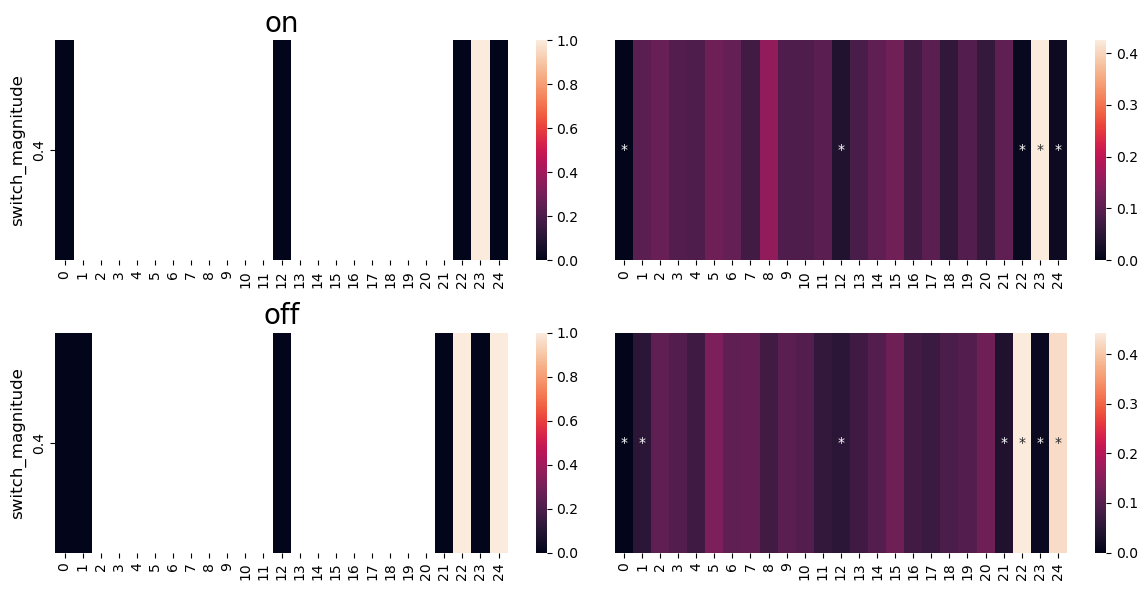

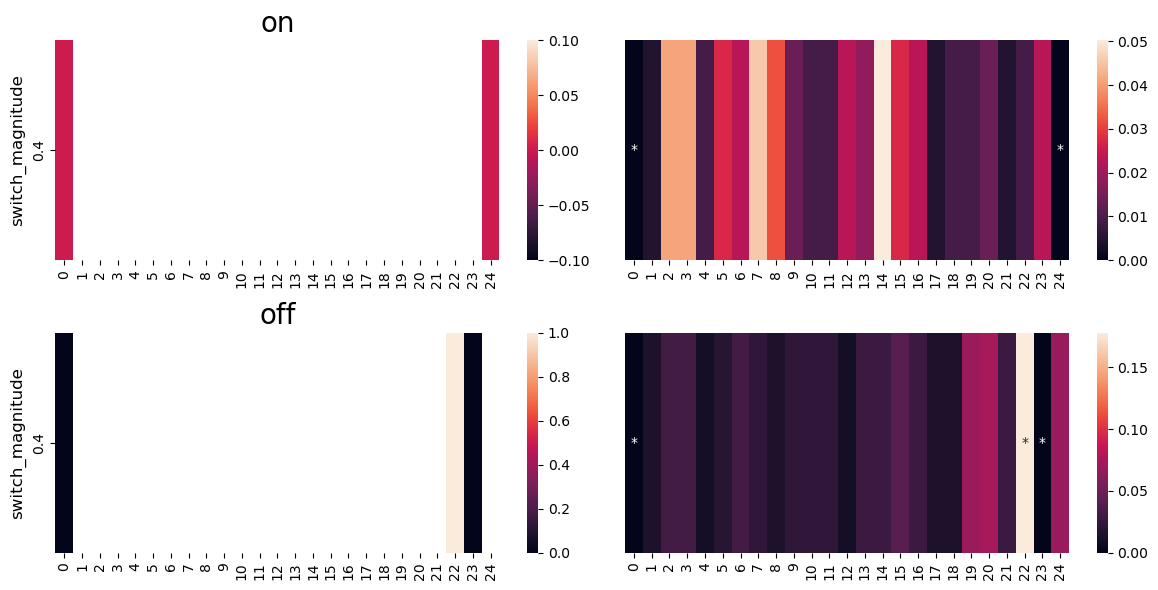

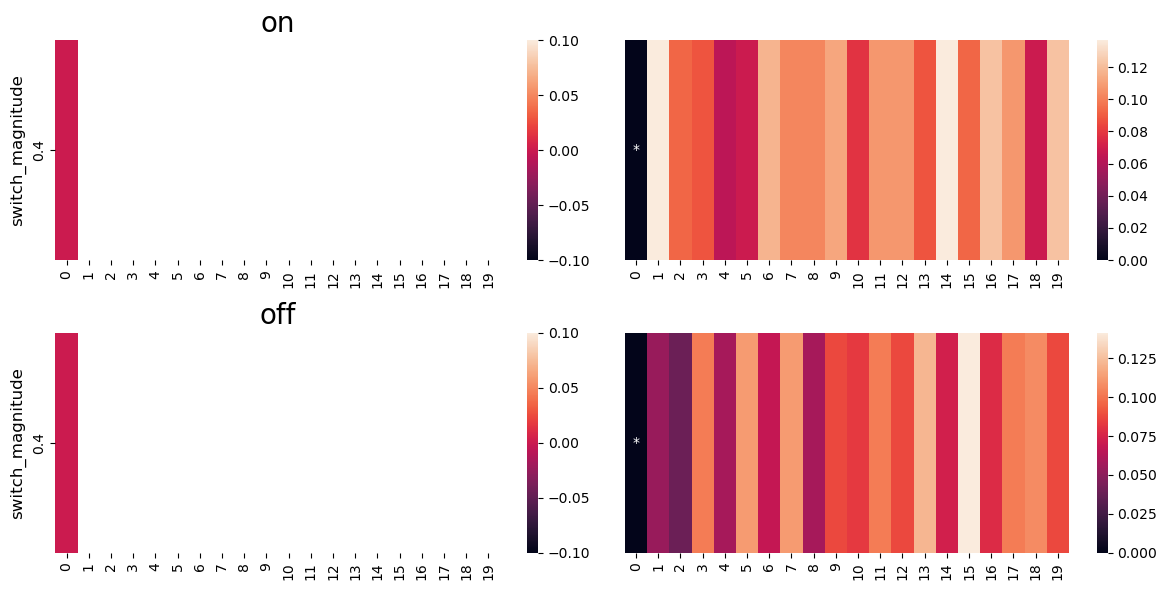

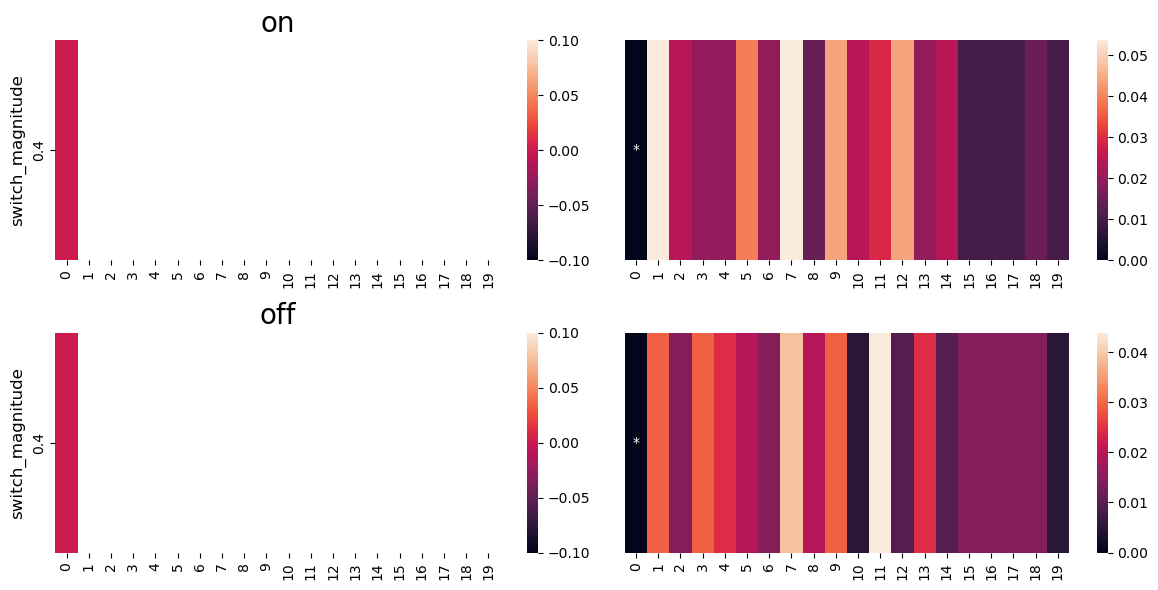

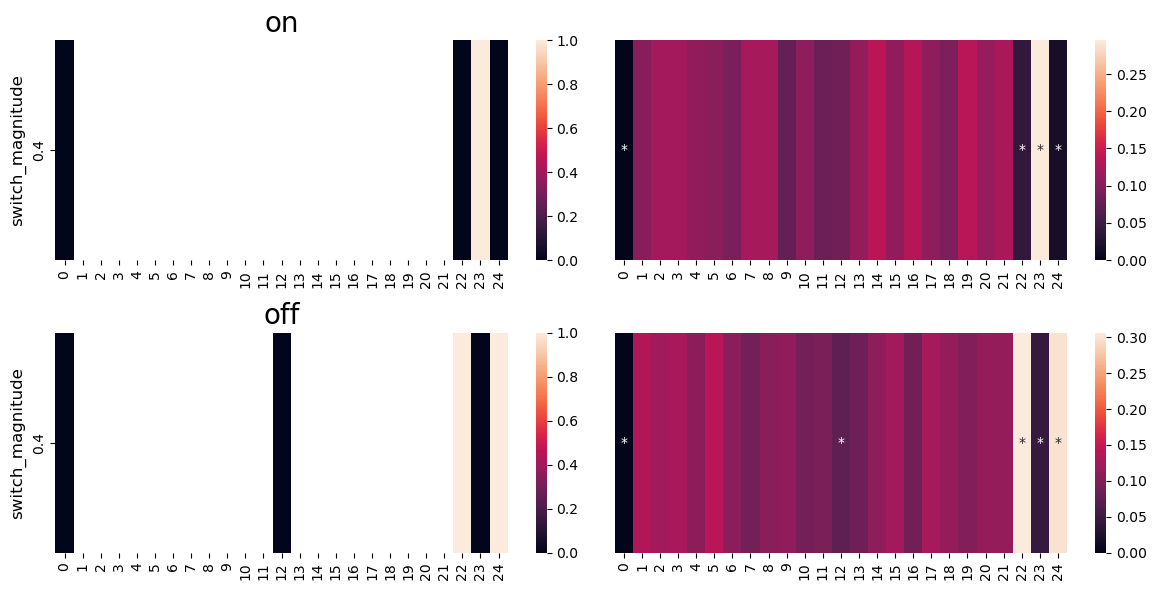

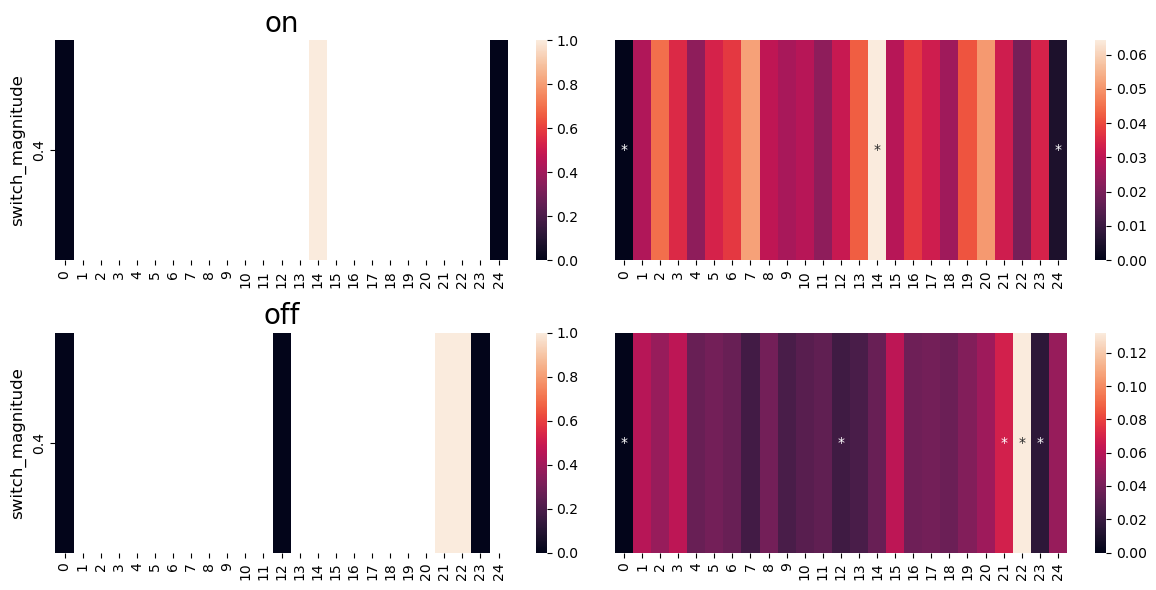

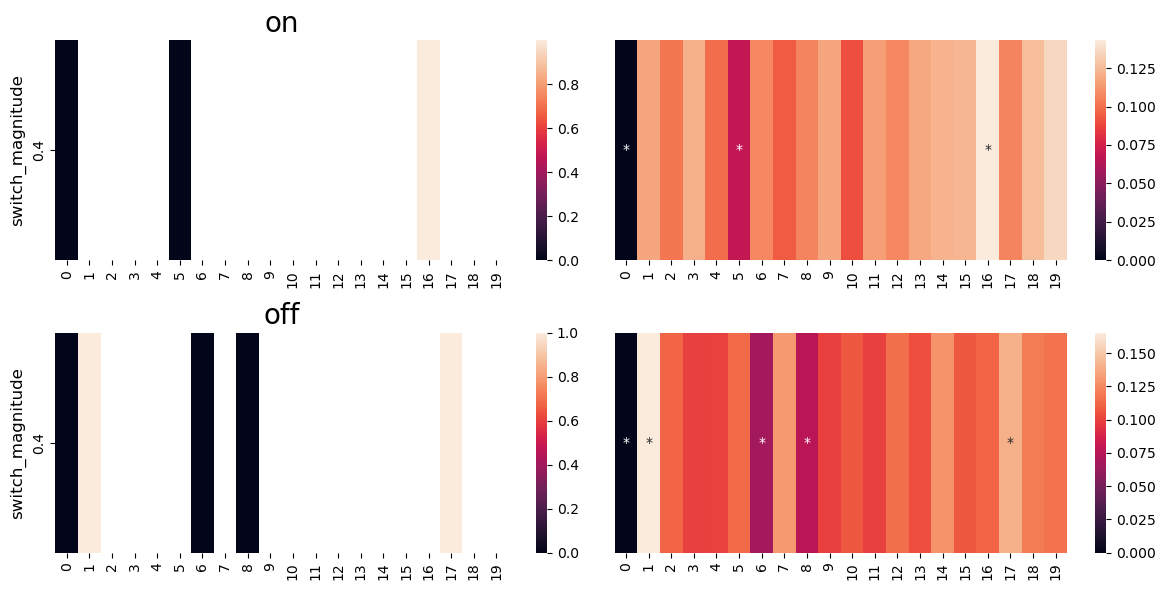

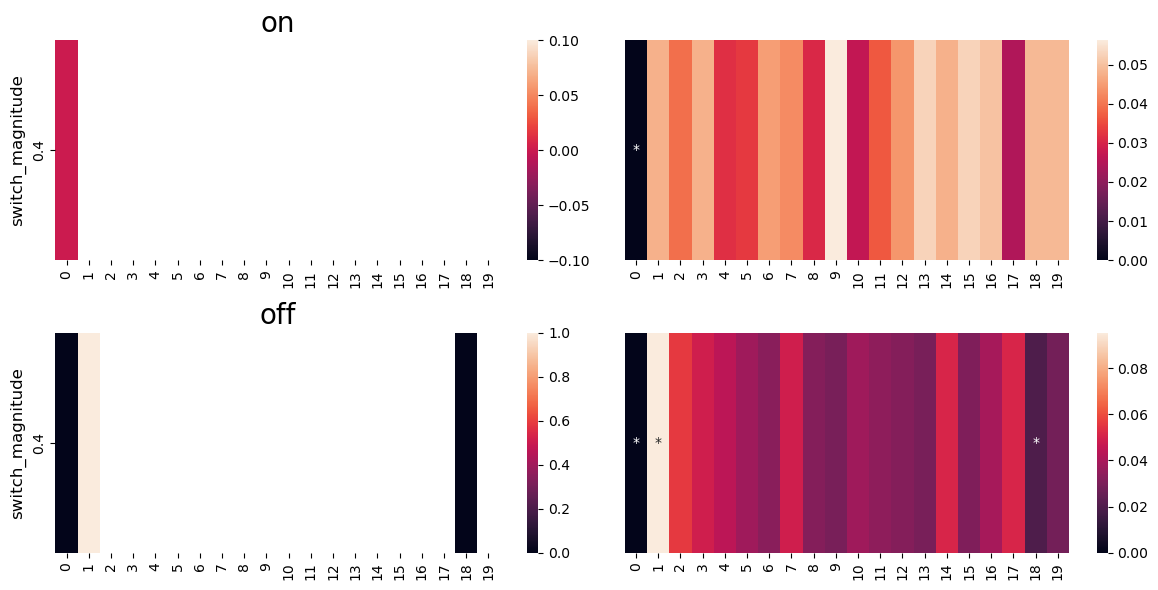

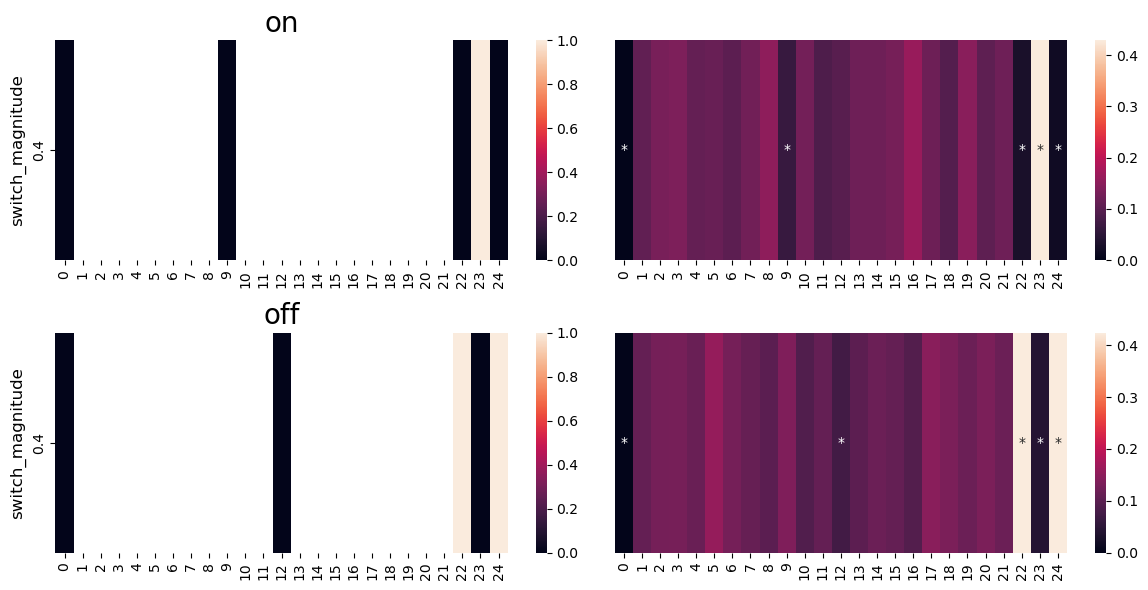

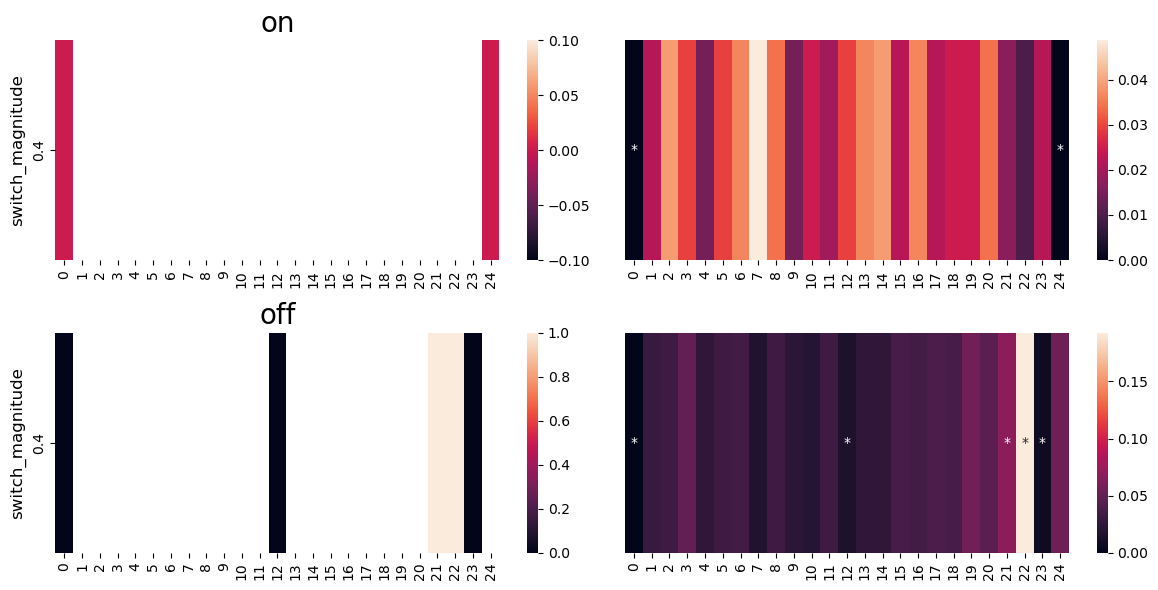

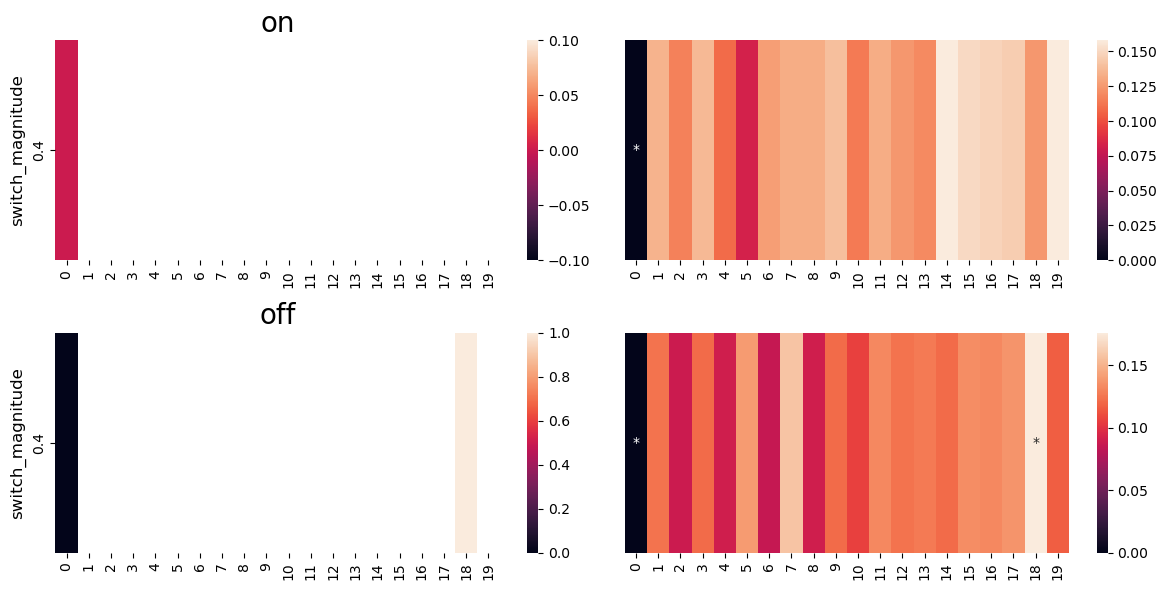

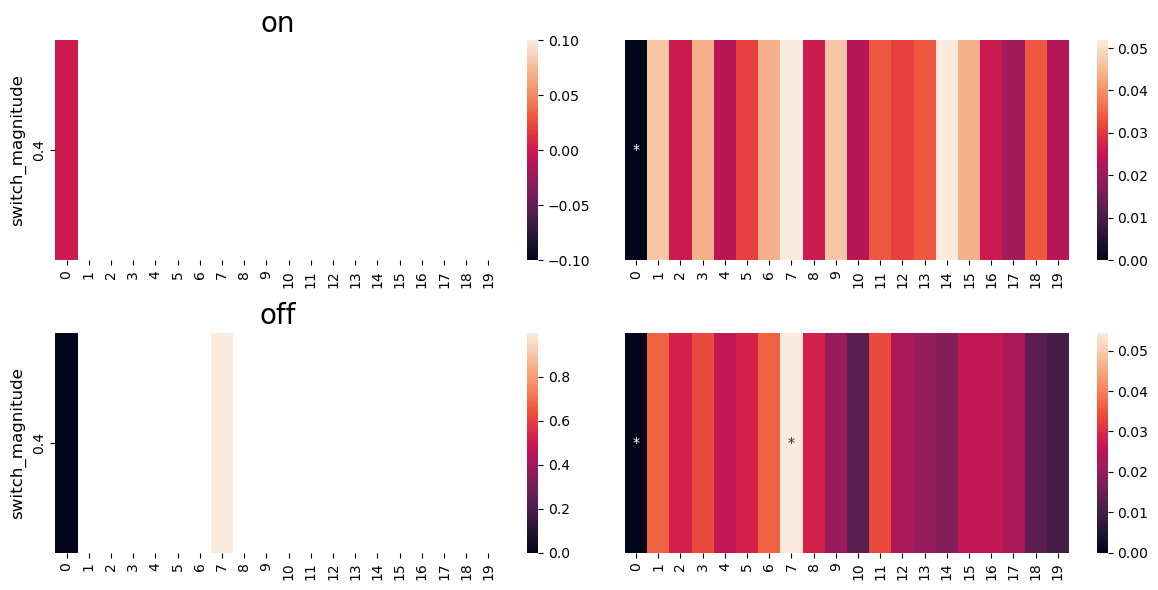

In [119]:
old_fn = "/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p"
sw_res_old = pickle.load(open(old_fn,'rb'))

In [147]:
pf_res_old=pf.field_detection_both_avg_trial_wrapper(data_dir_full, dosave=False,force_reload=False,nbins = 100, 
                                        save_fn = 'place_field_avg_and_trial_vthresh.p', 
                                        shuffle_fn=None,
                                        smth_in_bin=2.5, speed_thresh=1.,
                                        load_only=True,
                                        )

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_avg_and_trial_vthresh.p exists; loading---


In [151]:
pf_params_old = pf_res_old['avg']['params']
all_fields_old = pf_res_old['avg']['all_fields']

In [122]:
sw_res_old = sw_res_old['avg']

            start end com peak    fr_peak    fr_mean  other_field_index
field_index                                                            
0               0   4   1    0    6.17093   5.649742                NaN
1              34  47  40   41  22.798947  15.583268                NaN
2              76  80  78   78    7.73994   7.097266                NaN
3              94  99  96   99    8.41889   7.097633                NaN
46 1


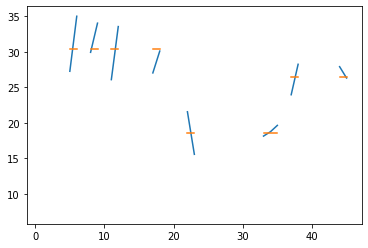

In [197]:
ii=12
one_row=sw_res['X_raw'].loc[0,0].iloc[ii]
uid,field_id = one_row.name
one_row.plot()
sw_res['X_pwc'].loc[0,0].iloc[ii].plot()
print(all_fields_recombined.loc[0,0].loc[uid])
print(uid,field_id)

,start,end,com,peak,fr_peak,fr_mean
field_index,,,,,,
0,34,47,40,41,23.222429,15.787566
1,76,80,77,77,7.255376,6.581669


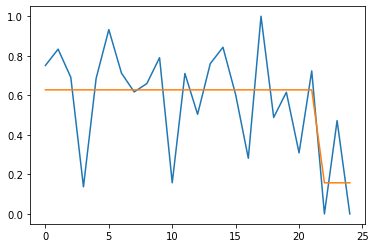

In [199]:
sw_res_old['X']['raw'][0,0].loc[uid,field_id].plot()
sw_res_old['X'][0.3][0,0].loc[uid,field_id].plot()
all_fields_old[0,0].loc[uid]

<AxesSubplot:>

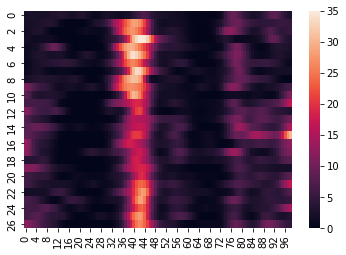

In [200]:
sns.heatmap(fr_map_all['fr_map_trial_df'].loc[0,0].loc[uid].T)

<AxesSubplot:ylabel='None-None-None-None'>

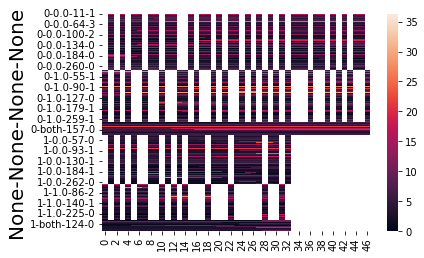

In [107]:
sns.heatmap(sw_res['X_pwc'])

<AxesSubplot:>

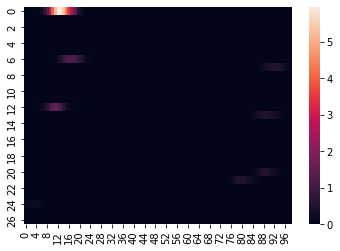

In [90]:
sns.heatmap(fr_map_all['fr_map_trial_df'].loc[0,0,18].T)

<AxesSubplot:xlabel='lin_binned'>

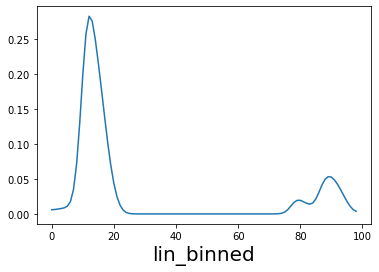

In [83]:
fr_map_all['fr_map'].loc[0,0,18].plot()

In [26]:
all_fields_recombined = pf_res['all_fields_recombined']
pf_params_recombined = pf_res['params_recombined']
all_fields = pf_res['all_fields']
pf_params = pf_res['params']

In [37]:
bool('False')

True

In [93]:
db.sort_values('n_pyr_putative',ascending=False).head(10)

data_dir_full  \
animal_name                                                        
e13_26m1    0  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e15_13f1    0  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            1  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            2  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
            3  /mnt/home/szheng/ceph/ad/roman_data/e15/e15_13...   
e13_26m1    1  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e13_16f1    7  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_16...   
e13_26m1    2  /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26...   
e16_3m2     3  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   
e16_3m1     0  /mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m...   

                     sess_name animal_name.1        date  \
animal_name                                                
e13_26m1    0  e13_26m1_210913      e13_26m1  2021-09-13   
e15_13f1    0  e15_13f1_220117      e15_13f1  2022-01-17   
            1  e15_13f1_220118      e15_13f1  2022-01-18   
            2  e15_13f1_220119      e15_13f1  2022-01-19   
            3  e15_13f1_220120      e15_13f1  2022-01-20   
e13_26m1    1  e13_26m1_211019      e13_26m1  2021-10-19   
e13_16f1    7  e13_16f1_210328      e13_16f1  2021-03-28   
e13_26m1    2  e13_26m1_211116      e13_26m1  2021-11-16   
e16_3m2     3   e16_3m2_211213       e16_3m2  2021-12-13   
e16_3m1     0   e16_3m1_210111       e16_3m1  2021-01-11   

                                    behavior  performance  ntrials  \
animal_name                                                          
e13_26m1    0                    alternation     0.956522       69   
e15_13f1    0                    alternation     0.617647       34   
            1   ['alternation' 'linearMaze']     0.740741       27   
            2  ['alternation' 'alternation']     0.721311       61   
            3   ['alternation' 'linearMaze']     0.800000       45   
e13_26m1    1  ['alternation' 'alternation']     0.730769       78   
e13_16f1    7                    alternation     0.850000       20   
e13_26m1    2   ['alternation' 'linearMaze']     0.850000       20   
e16_3m2     3  ['alternation' 'alternation']     0.703704       54   
e16_3m1     0                    alternation     0.882353       17   

               ngoodtrials  n_neurons  n_pyr_putative  owner   data_root  
animal_name                                                               
e13_26m1    0           69        482             422  roman  roman_data  
e15_13f1    0           34        376             333  roman  roman_data  
            1           27        363             318  roman  roman_data  
            2           61        343             288  roman  roman_data  
            3           45        303             248  roman  roman_data  
e13_26m1    1           78        271             228  roman  roman_data  
e13_16f1    7           20        211             174  roman  roman_data  
e13_26m1    2           20        209             173  roman  roman_data  
e16_3m2     3           54        207             163  roman  roman_data  
e16_3m1     0           17        203             162  roman  roman_data

In [35]:
import switch_detection_one_session as sdos
sw_res = sdos.main(data_dir_full,force_reload=True,test_mode=False)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan_recombine.p
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/sw_res_afterheadscan.p


In [95]:
sw_res_one=pickle.load(open('/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/sw_res_afterheadscan.p','rb'))




In [41]:
sw_res_one['pval'][1] <

0  0.0   29   0    0.065
              1    0.766
         30   1    0.151
              2    0.518
         31   1    0.950
                   ...  
   both  187  0    0.768
         188  0    0.216
         189  0    0.169
         191  0    0.620
         207  0    0.038
Name: 1, Length: 430, dtype: float64

In [97]:
(sw_res_one['best_n'] > 0).mean()

0.4645962732919255

In [52]:
old_fn = "/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/switch_analysis/shuffle_detection_vthresh_switch_res_switch_magnitude_only_fr_mean_highrepeats.p"
sw_res_old = pickle.load(open(old_fn,'rb'))

AttributeError: 'NoneType' object has no attribute 'new_figure_manager_given_figure'

In [54]:
change_df_old = sw_res_old['changes_df'].loc[(slice(None),slice(None),0.3,'switch_magnitude',0.4),:]

In [60]:
(change_df_old==1).any(axis=1)

0  0.0  0.3  switch_magnitude  0.4  1    0    False
                                    11   0     True
                                         1     True
                                    36   0    False
                                    39   0    False
                                              ...  
1  1.0  0.3  switch_magnitude  0.4  266  0     True
                                    267  0     True
                                         1     True
                                    270  0    False
                                         1     True
Length: 708, dtype: bool

In [61]:
old_shuffle_fn = '/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/instability/contiguous_instability.p'



In [64]:
old_shuffle_sw_res = pickle.load(open(old_shuffle_fn,'rb'))

In [68]:
old_shuffle_sw_res['instability_df_d'][0,0]['opt_issig']

     lin_binned
1    2             False
     5             False
11   3             False
     7              True
18   1              True
                   ...  
267  6              True
268  5             False
270  6             False
271  4             False
     8             False
Name: opt_issig, Length: 446, dtype: bool

In [78]:
pf_params.loc[0,0].loc['fr_peak']

0          1          2          3          4          5   \
11  0  10.958116   7.012667   8.193993   6.442413  13.733876   3.866006   
    1   7.705076  11.750571   9.812382   8.464413   9.852187   9.147687   
27  0  18.525612  18.677132  21.393393  21.516156  21.275264  21.228813   
    1  17.495781  14.943432  16.841863  18.293252  16.029594  27.284508   
    3  14.954658  22.102934  17.894825  19.467632  16.308302  10.903906   
...          ...        ...        ...        ...        ...        ...   
267 0  11.722609   0.201535   8.014614  10.935166   3.140113  24.566718   
268 0   5.231270   4.208667   5.817475   5.000512   4.764342   5.922298   
270 0  12.296827  19.702659   4.536487   9.687021  11.202650   1.099405   
    1   0.000000   6.571151   0.000000  14.716348   2.968163  13.933175   
271 0   3.387844   4.677537   4.209207   8.313427   4.039693   4.636834   

              6          7          8          9   ...         17         18  \
11  0   8.142214   3.948018  11.642218   6.556120  ...  12.342684   4.686021   
    1   9.530888   9.419103  11.585674  10.846730  ...  10.141129   7.182070   
27  0  24.806099  36.797501  20.742861  22.204486  ...  26.877416  15.600758   
    1  14.732052  17.428636  27.434289  16.684145  ...  11.179694  12.923756   
    3  22.644307  13.831161  17.904148  14.531577  ...  15.005905  12.949000   
...          ...        ...        ...        ...  ...        ...        ...   
267 0  26.956091  11.700738   6.864588   3.982974  ...   6.821400   5.819920   
268 0   4.376029   0.000000   3.783260   1.661879  ...   3.152353   0.916112   
270 0  20.174038  12.295646  17.303402   5.347536  ...  22.357604  11.739559   
    1  19.804709  27.387743   9.657940  11.155454  ...   0.000000  21.104876   
271 0   5.619697   6.110005   6.774874   5.166800  ...   7.013392   5.649279   

              19         20         21         22         23         24  \
11  0   4.648963   9.332421   5.369189   3.651083   3.724538   4.474991   
    1   7.356103  11.201621  16.616652   8.100672   8.471291  20.800111   
27  0  17.924353  20.282152  22.374657  18.006801  17.324800  12.822831   
    1  13.528683  20.329502  15.384722  19.276683  14.942264  12.309086   
    3  15.861222  14.685818  13.771688  13.675922  12.698483  11.443453   
...          ...        ...        ...        ...        ...        ...   
267 0  18.847667  14.222337   3.239014  10.588752  17.563730   7.772524   
268 0   5.520388   6.288199   4.011413   4.556119   3.321205   2.196951   
270 0   0.000000   2.424810   3.679659   4.335165   7.817669   2.228732   
    1   9.100529   4.493911   6.136099  29.655970   8.973251  13.330192   
271 0   5.799851   4.077174   2.754571   3.655825   5.048750   5.508336   

              25         26  
11  0   7.412574   6.593422  
    1  20.621940  13.803754  
27  0  16.047324  12.979135  
    1  13.502104  18.234590  
    3  11.408488  13.311092  
...          ...        ...  
267 0   8.757334   8.423825  
268 0   5.027201   2.382188  
270 0   2.960921   2.669442  
    1  10.090475  13.563507  
271 0   8.680895   5.190923  

[257 rows x 27 columns]

In [71]:
sw_res['pval'].loc[18]

KeyError: 18

In [70]:
sw_res['pval']

1    2
0 0.0  11  1  0.0  0.1
       27  0  0.0  1.0
           1  0.0  0.4
           3  0.0  0.2
       35  1  0.0  0.0
...           ...  ...
1 both 250 0  0.3  1.0
       252 0  0.0  0.0
       253 0  0.0  0.0
       261 0  0.3  0.3
       266 0  0.1  0.2

[805 rows x 2 columns]

In [62]:
old_shuffle_fn

'/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/instability/contiguous_instability.p'

In [32]:
# reload(tcp)
reload(sdos)
sw_res = sdos.main(data_dir_full,force_reload=False,test_mode=True)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan.p exists; loading---


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) 

saved at /mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/place_field_afterheadscan_recombine.p
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
